In [1]:
import pandas as pd
import sys
import numpy as np
import os
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/hsc_landscape.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 8.74 GB, difference +8.74 GB


AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [3]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/cytotrace/cytotrace_results.csv"
df = pd.read_csv(fpath)
print(f"{df.shape=}")
df.head()

df.shape=(54347, 3)


,cell_id,preKNN_CytoTRACE2_Score,preKNN_CytoTRACE2_Potency
0,AAACCCAAGGTTACCT_iHSC,0.540109,Multipotent
1,AAACCCAAGTTGAAGT_iHSC,0.354983,Oligopotent
2,AAACCCAAGTTGTCGT_iHSC,0.057476,Differentiated
3,AAACCCACAGAAGCGT_iHSC,0.046240,Differentiated
4,AAACCCACAGGAGGTT_iHSC,0.644041,Multipotent


In [4]:
df['preKNN_CytoTRACE2_Potency'].value_counts()

preKNN_CytoTRACE2_Potency
Multipotent       38342
Differentiated    11195
Oligopotent        4768
Unipotent            38
Pluripotent           4
Name: count, dtype: int64

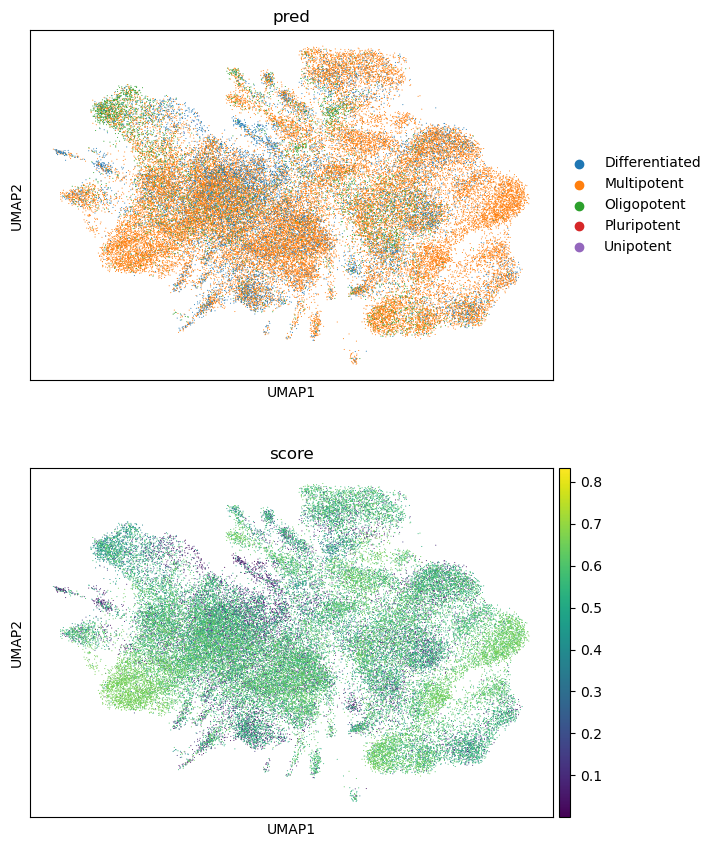

In [5]:
adata.obs['pred'] = df['preKNN_CytoTRACE2_Potency'].values
adata.obs['score'] = df['preKNN_CytoTRACE2_Score'].values

sc.pl.umap(
    adata,
    color=['pred', 'score'],
    ncols=1,
)

In [6]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

<Axes: xlabel='score', ylabel='pred'>

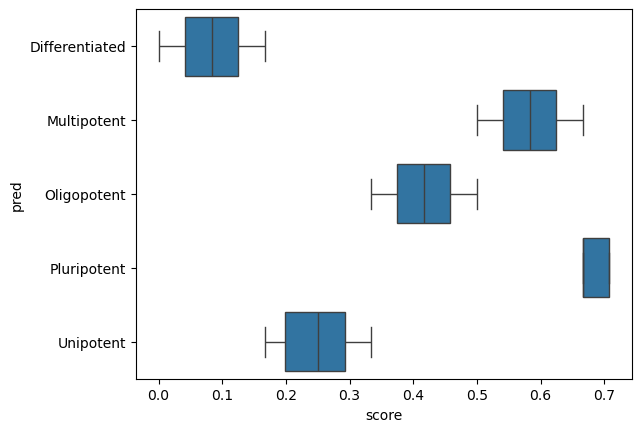

In [8]:
sns.boxplot(
    data=adata.obs,
    y='pred',
    x='score',
    showfliers=False,
)

<Axes: xlabel='score', ylabel='cell_type'>

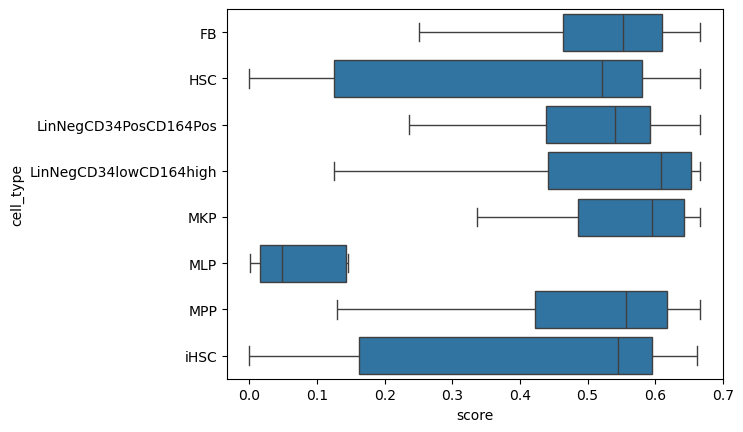

In [9]:
sns.boxplot(
    data=adata.obs,
    y='cell_type',
    x='score',
    showfliers=False,
)

In [10]:
adata.obs['cell_type'].value_counts()

cell_type
FB                        26586
iHSC                       8574
LinNegCD34PosCD164Pos      6343
HSC                        5798
LinNegCD34lowCD164high     4265
MPP                        1795
MKP                         863
MLP                         123
Name: count, dtype: int64

In [ ]:

sc.pl.umap(
    adata,
    color='pred',
    s=40
)